## Detector model: Kiukas / Ruschhaupt / Schmidt / Werner

In [89]:
from sympy import *
#from sympy.physics.matrices import mdft
#from sympy.physics.quantum import TensorProduct
from sympy.functions.special.delta_functions import Heaviside
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot, plot3d_parametric_line
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['text.usetex'] = False

# https://matplotlib.org/gallery/mplot3d/lines3d.html?highlight=parametric
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


In [90]:
gamma = Symbol('gamma', real=True)
t = Symbol('t', real=True)
tprime = Symbol('t\'', real=True)
omega = Symbol('omega', real=True)

In [91]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [92]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [93]:
init_printing ()


In [94]:
H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [95]:
H.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [96]:
def K(_gamma):
    return H - I*D(_gamma)

In [97]:
K(2*sqrt(2))

⎡0    1  ⎤
⎢        ⎥
⎣1  -√2⋅ⅈ⎦

In [98]:
K(2*sqrt(2)).eigenvects()

⎡⎛                ⎡⎡   -1    ⎤⎤⎞  ⎛              ⎡⎡    -1     ⎤⎤⎞⎤
⎢⎜                ⎢⎢─────────⎥⎥⎟  ⎜              ⎢⎢───────────⎥⎥⎟⎥
⎢⎜  √2   √2⋅ⅈ     ⎢⎢√2   √2⋅ⅈ⎥⎥⎟  ⎜√2   √2⋅ⅈ     ⎢⎢  √2   √2⋅ⅈ⎥⎥⎟⎥
⎢⎜- ── - ────, 1, ⎢⎢── + ────⎥⎥⎟, ⎜── - ────, 1, ⎢⎢- ── + ────⎥⎥⎟⎥
⎢⎜  2     2       ⎢⎢2     2  ⎥⎥⎟  ⎜2     2       ⎢⎢  2     2  ⎥⎥⎟⎥
⎢⎜                ⎢⎢         ⎥⎥⎟  ⎜              ⎢⎢           ⎥⎥⎟⎥
⎣⎝                ⎣⎣    1    ⎦⎦⎠  ⎝              ⎣⎣     1     ⎦⎦⎠⎦

In [99]:
def B(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [100]:
def U():
    return lambda t: exp(-I*H*t)

In [101]:
def non_unitary_psi(_t):
    return B(2*sqrt(2))(_t) * Matrix([1,0])

In [102]:
def unitary_psi(_t):
    return U()(_t) * Matrix([1,0])

In [103]:
non_unitary_psi(t)

⎡          √2⋅t   √2⋅ⅈ⋅t             √2⋅t   √2⋅ⅈ⋅t⎤
⎢        - ──── - ──────           - ──── + ──────⎥
⎢           2       2                 2       2   ⎥
⎢√2⋅ⅈ⋅t⋅ℯ                  √2⋅ⅈ⋅t⋅ℯ               ⎥
⎢─────────────────────── - ───────────────────────⎥
⎢     ⎛√2⋅t   √2⋅ⅈ⋅t⎞           ⎛√2⋅t   √2⋅ⅈ⋅t⎞   ⎥
⎢   2⋅⎜──── + ──────⎟         2⋅⎜──── - ──────⎟   ⎥
⎢     ⎝ 2       2   ⎠           ⎝ 2       2   ⎠   ⎥
⎢                                                 ⎥
⎢          √2⋅t   √2⋅ⅈ⋅t         √2⋅t   √2⋅ⅈ⋅t    ⎥
⎢        - ──── - ──────       - ──── + ──────    ⎥
⎢           2       2             2       2       ⎥
⎢    √2⋅ℯ                  √2⋅ℯ                   ⎥
⎢    ─────────────────── - ───────────────────    ⎥
⎣             2                     2             ⎦

New period

In [104]:
2*pi / (sqrt(2)/2)

Components are either pure real or pure imaginary:

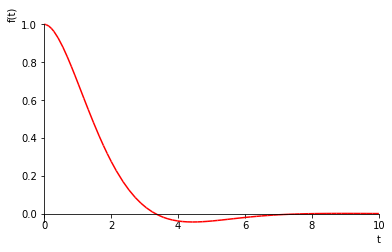

In [106]:
plot(re(non_unitary_psi(t)[0]), (t, 0, 10), line_color='r')

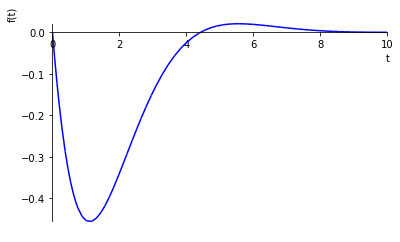

In [114]:
plot(im(non_unitary_psi(t)[1]), (t, 0, 10), line_color='b')

In [20]:
def lossy_norm(_t):
    psi = B(2*sqrt(2))(_t) * Matrix([1,0])
    return abs(psi[0])**2 + abs(psi[1])**2

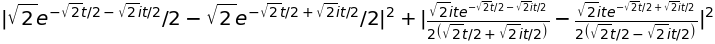

In [21]:
lossy_norm(t)

In [22]:
non_unitary_psi_n = lambdify(t, non_unitary_psi(t), "numpy")

In [23]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [24]:
def non_unitary_psi_renorm_n(_t):
    return non_unitary_psi_n(_t) / np.sqrt(lossy_norm_n(_t))

In [25]:
T = np.linspace(1e-16, 10, 2000)

In [26]:
#fig = plt.figure(figsize=(12,12))
#
#ax = fig.gca(projection='3d')
#ax.view_init(15,-45) # rotate 3d point of view
##ax2 = fig.gca(projection='3d')#
#
#ax.plot(
#    np.real(non_unitary_psi_n(T)[0][0]), np.imag(non_unitary_psi_n(T)[1][0]), T,
#    linewidth=1.25
#)
##ax2.plot(
##    np.real(non_unitary_psi_n(T)[1][0]), np.imag(non_unitary_psi_n(T)[1][0]), T,
##    'r',
##    label='<\u03C8|1>',
##    linewidth=1
##)

##ax.legend()
##ax2.legend()

#plt.xlabel('Re <0|\u03C8> (pure real)')
#plt.ylabel('Im <1|\u03C8> (pure imag)')
#ax.set_zlabel('t')


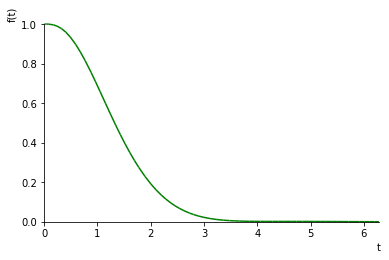

In [111]:
plot(lossy_norm(t),(t, 0, 2*pi), line_color='g')

In [28]:
def prob_0_detect(t):
    return abs(non_unitary_psi(t)[0]**2) / lossy_norm(t)

In [29]:
def prob_1_detect(t):
    return abs(non_unitary_psi(t)[1]**2) / lossy_norm(t)

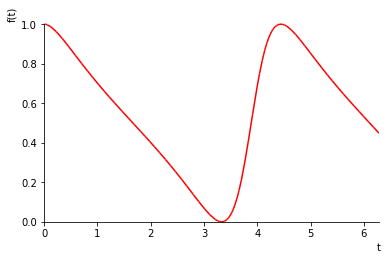

In [115]:
plot(prob_0_detect(t),(t, 0, 2*pi), line_color='r')

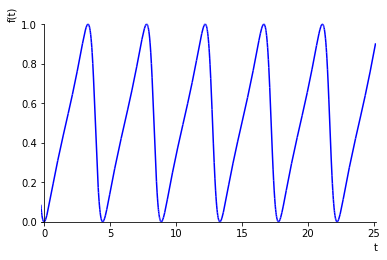

In [127]:
plot(prob_1_detect(t),(t, -0.25, 8*pi), line_color='b')

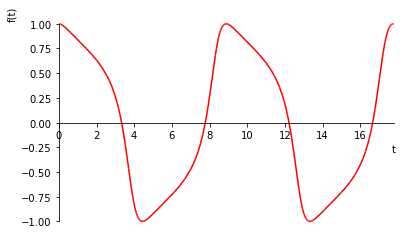

In [128]:
plot(re(non_unitary_psi(t)[0])/sqrt(lossy_norm(t)), (t, 0, 2 * 2*sqrt(2)*pi), line_color='r')

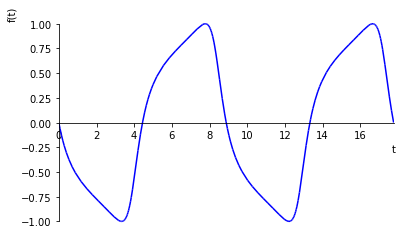

In [129]:
plot(im(non_unitary_psi(t)[1])/sqrt(lossy_norm(t)), (t, 0, 2 * 2*sqrt(2)*pi), line_color='b')

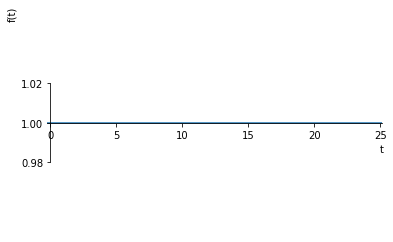

In [951]:
plot(prob_0_detect(t) + prob_1_detect(t),(t, -0.25, 8*pi))

In [130]:
#plot(log(abs(non_unitary_psi(t)[0]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

In [131]:
#plot(log(abs(non_unitary_psi(t)[1]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

In [133]:
def prob_0_unitary(t):
    return abs(unitary_psi(t)[0]**2)

In [134]:
def prob_1_unitary(t):
    return abs(unitary_psi(t)[1]**2)

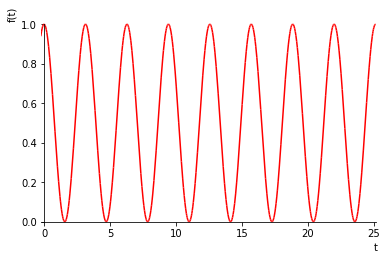

In [135]:
plot(prob_0_unitary(t),(t, -0.25, 8*pi), line_color='r')

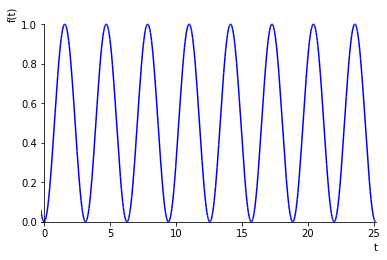

In [136]:
plot(prob_1_unitary(t),(t, -0.25, 8*pi), line_color='b')

In [958]:
lossy_norm_n(2)

In [138]:
X = np.linspace(1e-6, 8*np.pi, 5000)  # avoid singularity in t=0

In [139]:
Y = lossy_norm_n(X)

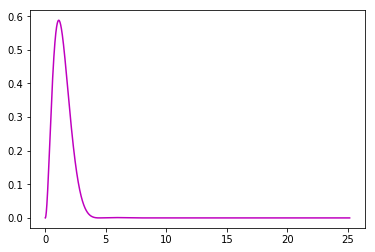

In [143]:
plt.plot(X, -np.gradient(Y, X), 'm')

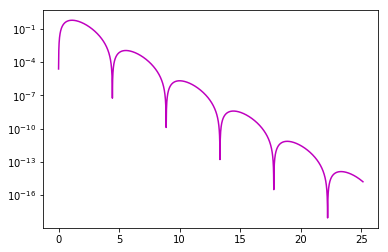

In [144]:
plt.semilogy(X, -np.gradient(Y, X), 'm')

In [149]:
# we have set gamma = 2*sqrt(2)
def hatpsi(_t):
    return \
        Heaviside(_t) * \
        2**(5/4) * \
        Matrix([
            [0, 0],
            [0, 1]
        ]) * \
        non_unitary_psi(_t)
        
        
    

In [150]:
def hatpsisquarednorm(_t):
    return abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2)

In [151]:
hatpsisquarednorm(-1)

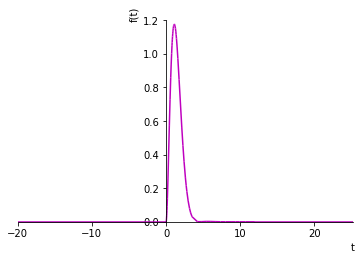

In [153]:
plot(hatpsisquarednorm(t), (t, -20, 8*pi), line_color='m')

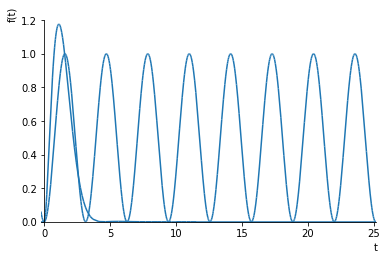

In [157]:
plot(prob_1_unitary(t), hatpsisquarednorm(t), (t, -0.25, 8*pi))

In [968]:
def prob_0_hatpsi(_t):
    return abs(hatpsi(_t)[0]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

In [969]:
def prob_1_hatpsi(_t):
    return abs(hatpsi(_t)[1]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

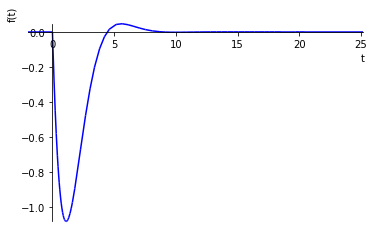

In [158]:
plot(im(hatpsi(t)[1]), (t, -2, 8*pi), line_color='b')

In [971]:
im(hatpsi(t)[1])

In [160]:
def fhatpsi1(_omega):
    return fourier_transform(hatpsi(t)[1], t, _omega)

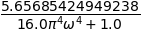

In [161]:
abs(fhatpsi1(omega))**2

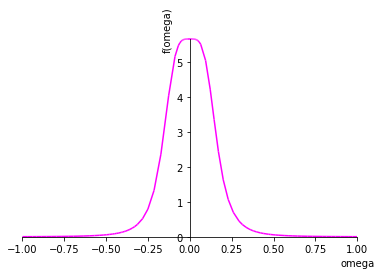

In [162]:
plot(abs(fhatpsi1(omega))**2, (omega, -1, 1), line_color='magenta')

## (Discrete) Page-Wootters model

In [34]:
from scipy.linalg import dft

In [35]:
T = np.diag(np.arange(0,32)) * np.pi / 16

In [36]:
F = dft(32, scale='sqrtn')

In [37]:
F[0][0]

(0.17677669529663687+0j)

In [38]:
F_dagger = F.conj().T

In [39]:
F_dagger[0][0]

(0.17677669529663687-0j)

In [40]:
F_dagger

array([[ 0.1767767 -0.j        ,  0.1767767 -0.j        ,
         0.1767767 -0.j        , ...,  0.1767767 -0.j        ,
         0.1767767 -0.j        ,  0.1767767 -0.j        ],
       [ 0.1767767 -0.j        ,  0.17337998+0.03448742j,
         0.16332037+0.06764951j, ...,  0.14698445-0.09821187j,
         0.16332037-0.06764951j,  0.17337998-0.03448742j],
       [ 0.1767767 -0.j        ,  0.16332037+0.06764951j,
         0.125     +0.125j     , ...,  0.06764951-0.16332037j,
         0.125     -0.125j     ,  0.16332037-0.06764951j],
       ...,
       [ 0.1767767 -0.j        ,  0.14698445-0.09821187j,
         0.06764951-0.16332037j, ..., -0.03448742+0.17337998j,
         0.06764951+0.16332037j,  0.14698445+0.09821187j],
       [ 0.1767767 -0.j        ,  0.16332037-0.06764951j,
         0.125     -0.125j     , ...,  0.06764951+0.16332037j,
         0.125     +0.125j     ,  0.16332037+0.06764951j],
       [ 0.1767767 -0.j        ,  0.17337998-0.03448742j,
         0.16332037-0.06764951

In [41]:
Omega = F @ T @ F_dagger * 16 / np.pi

In [42]:
H = np.array([
    [0, 1],
    [1, 0]
])

In [43]:
D = np.array([
    [0, 0],
    [0, np.sqrt(2)]
])

In [44]:
K = H - 1j*D

In [45]:
K

array([[0.+0.j        , 1.+0.j        ],
       [1.+0.j        , 0.-1.41421356j]])

In [46]:
J = np.kron(Omega, np.eye(2)) + np.kron(np.eye(32), K)

In [53]:
eigenvalues, eigenvectors = np.linalg.eig(J.T)

In [54]:
eigenvalues

array([31.70710678-0.70710678j, -0.70710678-0.70710678j,
       30.70710678-0.70710678j,  0.29289322-0.70710678j,
       30.29289322-0.70710678j,  0.70710678-0.70710678j,
       29.70710678-0.70710678j,  1.29289322-0.70710678j,
       29.29289322-0.70710678j,  1.70710678-0.70710678j,
       28.70710678-0.70710678j,  2.29289322-0.70710678j,
       28.29289322-0.70710678j,  2.70710678-0.70710678j,
       27.70710678-0.70710678j, 27.29289322-0.70710678j,
        3.29289322-0.70710678j,  3.70710678-0.70710678j,
       26.70710678-0.70710678j, 26.29289322-0.70710678j,
        4.29289322-0.70710678j,  4.70710678-0.70710678j,
       25.70710678-0.70710678j, 25.29289322-0.70710678j,
        5.29289322-0.70710678j,  5.70710678-0.70710678j,
       24.70710678-0.70710678j, 24.29289322-0.70710678j,
        6.29289322-0.70710678j,  6.70710678-0.70710678j,
       23.70710678-0.70710678j, 23.29289322-0.70710678j,
        7.29289322-0.70710678j,  7.70710678-0.70710678j,
       22.70710678-0.70710678j,

In [55]:
#eigenvectors

In [56]:
def qubit_history(eigenindex):
    # Needs matrix transposition ".T" (different convention as opposed to Mathematica)
    eigenvector = eigenvectors.T[eigenindex]
    eigenvalue = eigenvalues[eigenindex]
    _qubit_history = np.empty([32, 2], dtype=np.complex)
    for i in range(0,32):
        t = i * 2 * np.pi / 32
        qubit = np.array([
            eigenvector[2*i],
            eigenvector[2*i+1]
        ]) * np.exp(-1j * t * eigenvalue)
        _qubit_history[i] = qubit
    return _qubit_history

In [57]:
# star with |0> as close as possible
qbhist = qubit_history(0) + qubit_history(1) + 0.1*qubit_history(2) 

In [68]:
qbhist[0][0]

(-0.1875385062815591+0.007393574364480902j)

In [58]:
np.abs(qbhist[0][0]**2) / (np.abs(qbhist[0][0]**2) + np.abs(qbhist[0][1]**2)) 

In [59]:
times = np.arange(0, 2*np.pi, np.pi/16)
norms = np.zeros(32)
probs0 = np.zeros(32)
probs1 = np.zeros(32)

for i in range(0, 32):
    norms[i] = (np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2))
    probs0[i] = np.abs(qbhist[i][0]**2) / (
        np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2) )
    probs1[i] = np.abs(qbhist[i][1]**2) / (
        np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2) ) 

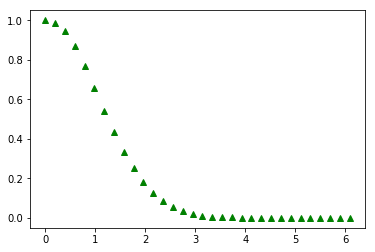

In [87]:
plt.plot(times, norms/norms[0], 'g^')

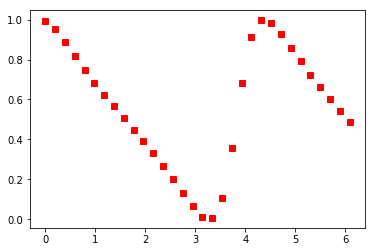

In [69]:
plt.plot(times, probs0, 'rs')

### Check that "linear combinations of qubit histories" work as expected

In [62]:
qbhist1 = np.array([
    [0, 1],
    [2, 3]
])

In [63]:
qbhist2 = np.array([
    [4, 5],
    [6, 7]
])

In [64]:
qbhist1 + qbhist2

array([[ 4,  6],
       [ 8, 10]])